# Lecture 8: Introduction to classification

# **Classification**

## **Introduction to Classification**

Classification is one of the key tasks in machine learning, which involves assigning new data to one or more predefined categories. It is widely used in various fields such as text analysis, image recognition, medicine, and financial forecasting.

---

## **What is Classification?**

Classification involves developing a decision function that, based on a set of input features, determines which category (class) an object belongs to. The algorithm learns this function from labeled training data, which contains examples with assigned class labels.

### **Types of Classification**

1. **Binary Classification**:
   - Data is assigned to one of two classes.
   - Example: Is an email spam? (Spam/Not Spam)

2. **Multiclass Classification**:
   - Data can belong to one of many classes.
   - Example: Recognizing flower species (setosa, versicolor, virginica).

3. **Multilabel Classification**:
   - Data can belong to more than one class simultaneously.
   - Example: Tagging topics in articles (sports, technology, politics).

---

## **Examples of Classification Applications**

1. **Medicine**:
   - Diagnosing diseases based on test results (Healthy/Sick).
2. **Text Analysis**:
   - Classifying emails (Spam/Not Spam).
   - Sentiment analysis (Positive/Negative).
3. **Image Recognition**:
   - Identifying objects in images (Cat/Dog).
4. **Finance**:
   - Predicting credit risk (Good/Bad credit score).
5. **Engineering and Industry**:
   - Detecting machine failures (Working/Not Working).

---

## **How Does Classification Work?**

1. **Training Dataset**:
   - The algorithm is provided with a set of examples, where each sample is labeled with a class.

2. **Model Building**:
   - The algorithm creates rules (a decision function) that allow it to assign new data to the appropriate classes.

3. **Model Evaluation**:
   - The model is tested on a separate test dataset that was not used during training.

4. **Prediction**:
   - The model assigns new samples to appropriate classes based on the learned rules.

---

## **Key Classification Algorithms**

1. **Logistic Regression**:
   - A classic algorithm for binary classification that predicts the probability of belonging to a particular class.

2. **k-Nearest Neighbors (k-NN)**:
   - A distance-based algorithm that assigns a class based on the nearest neighbors in feature space.

3. **Decision Trees**:
   - Build a tree structure where each node represents a decision based on data features.

4. **Naive Bayes**:
   - A probabilistic algorithm assuming feature independence; commonly used in text classification.

5. **Support Vector Machines (SVM)**:
   - An algorithm that maximizes the margin between classes, effective for complex decision boundaries.

---

## **Decision Boundary**

A decision boundary is a line (or surface in multidimensional space) that separates different classes. In classification, it is crucial for the decision boundary to be well-suited to the data:
- **Overfitting**: The boundary is too closely fitted to the training data, causing the model to fail at generalization.
- **Underfitting**: The boundary is too simplistic, ignoring important patterns in the data.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for classification
def interactive_classification(C=1.0, kernel='rbf', gamma=1.0):
    # Train SVM model with specified parameters
    model = SVC(C=C, kernel=kernel, gamma=gamma)
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Plot decision boundary
    plt.figure(figsize=(12, 6))
    
    # Create mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data', edgecolor='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test Data', edgecolor='k')
    
    # Titles and labels
    plt.title(f"SVM Decision Boundary\nTrain Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for parameters
interact(
    interactive_classification,
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='C (Regularization)'),
    kernel=widgets.RadioButtons(options=['linear', 'rbf', 'poly'], value='rbf', description='Kernel'),
    gamma=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='Gamma')
)


C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\__init__.py:16: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.sparse import issparse


interactive(children=(FloatLogSlider(value=1.0, description='C (Regularization)', max=2.0, min=-2.0), RadioBut…

<function __main__.interactive_classification(C=1.0, kernel='rbf', gamma=1.0)>

# **Evaluation Metrics in Classification**

Evaluating classification models is crucial to understanding how well a model assigns samples to appropriate classes. Below are the most important metrics used in classification along with their applications.

---

## **1. Confusion Matrix**

The confusion matrix is a table that shows the number of correct and incorrect classifications for each class. It consists of four key values (for binary classification):

- **True Positive (TP)**: Samples correctly classified as positive.
- **True Negative (TN)**: Samples correctly classified as negative.
- **False Positive (FP)**: Samples incorrectly classified as positive (false alarms).
- **False Negative (FN)**: Samples incorrectly classified as negative.

|                 | Predicted Positive | Predicted Negative |
|-----------------|---------------------|---------------------|
| **True Positive (TP)** | Number of samples     | -                   |
| **False Positive (FP)** | Number of samples     | -                   |
| **False Negative (FN)** | -                 | Number of samples       |
| **True Negative (TN)** | -                 | Number of samples       |

---

## **2. Accuracy**

Accuracy measures the percentage of correctly classified samples in the entire dataset:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Advantage**: Simple to understand and calculate.
- **Disadvantage**: Insufficient for imbalanced datasets (e.g., 95% samples in one class).

---

## **3. Precision**

Precision measures the accuracy of predictions for the positive class:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Application**: Important when minimizing false alarms is crucial (e.g., rare disease classification).

---

## **4. Recall (Sensitivity, TPR)**

Recall measures the model's ability to detect all samples belonging to the positive class:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Application**: Important when minimizing missed cases is crucial (e.g., fraud detection).

---

## **5. F1-Score**

F1-Score is the harmonic mean of precision and recall, combining these two metrics into one:

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Application**: Useful when balancing precision and recall, especially for imbalanced data.

---

## **6. Specificity (TNR)**

Specificity measures the model's ability to correctly identify samples belonging to the negative class:

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

- **Application**: Important in scenarios where minimizing false alarms is critical (e.g., security systems).

---

## **7. NPV (Negative Predictive Value)**

NPV measures the percentage of samples classified as negative that truly belong to the negative class:

$$
\text{NPV} = \frac{TN}{TN + FN}
$$

- **Application**: Important when evaluating the correctness of negative classifications.

---

## **8. ROC Curve and AUC**

- **ROC Curve (Receiver Operating Characteristic Curve)**: A graphical representation of the trade-off between True Positive Rate (Recall) and False Positive Rate (FPR) for different classification thresholds:
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$

- **AUC (Area Under the Curve)**: A measure of model quality. A value close to 1 indicates a perfect model, while a value of 0.5 suggests a random model.

---

## **9. Precision-Recall (PR) Curve and PR AUC**

- **PR Curve**: A graphical representation of the trade-off between Precision and Recall for different classification thresholds. It is especially useful for imbalanced datasets where the positive class is rare.
  
- **PR AUC (Area Under the Precision-Recall Curve)**: A single-number summary of the PR Curve that evaluates the model's ability to balance Precision and Recall. Higher values indicate better performance.

### Key Notes:
- Unlike the ROC Curve, the PR Curve focuses on the positive class and provides more meaningful insights for imbalanced datasets.
- The curve typically shows a sharp drop in precision as recall increases, indicating the challenge of maintaining precision at higher recall levels.

---

## **10. Log-Loss**

Log-Loss measures the certainty of the model's predictions by considering probabilities:

$$
\text{Log-Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

- **Application**: Particularly important for probabilistic models such as logistic regression.

---

## **Summary**

- **Accuracy** is easy to interpret but not always suitable for imbalanced data.
- **Precision** and **Recall** provide a better understanding for datasets with uneven class distributions.
- **F1-Score** balances precision and recall effectively.
- **Specificity** and **NPV** are particularly important for analyzing the negative class.
- **ROC Curve and AUC** assess the model's ability to distinguish between classes across different decision thresholds.
- **PR Curve and PR AUC** are essential for evaluating performance on imbalanced datasets and assessing the trade-off between precision and recall.

The choice of an appropriate metric depends on the specifics of the problem and which type of error is more costly in the given context.
# **Evaluation Metrics in Classification**

Evaluating classification models is crucial to understanding how well a model assigns samples to appropriate classes. Below are the most important metrics used in classification along with their applications.

---

## **1. Confusion Matrix**

The confusion matrix is a table that shows the number of correct and incorrect classifications for each class. It consists of four key values (for binary classification):

- **True Positive (TP)**: Samples correctly classified as positive.
- **True Negative (TN)**: Samples correctly classified as negative.
- **False Positive (FP)**: Samples incorrectly classified as positive (false alarms).
- **False Negative (FN)**: Samples incorrectly classified as negative.

|                 | Predicted Positive | Predicted Negative |
|-----------------|---------------------|---------------------|
| **True Positive (TP)** | Number of samples     | -                   |
| **False Positive (FP)** | Number of samples     | -                   |
| **False Negative (FN)** | -                 | Number of samples       |
| **True Negative (TN)** | -                 | Number of samples       |

---

## **2. Accuracy**

Accuracy measures the percentage of correctly classified samples in the entire dataset:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Advantage**: Simple to understand and calculate.
- **Disadvantage**: Insufficient for imbalanced datasets (e.g., 95% samples in one class).

---

## **3. Precision**

Precision measures the accuracy of predictions for the positive class:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Application**: Important when minimizing false alarms is crucial (e.g., rare disease classification).

---

## **4. Recall (Sensitivity, TPR)**

Recall measures the model's ability to detect all samples belonging to the positive class:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Application**: Important when minimizing missed cases is crucial (e.g., fraud detection).

---

## **5. F1-Score**

F1-Score is the harmonic mean of precision and recall, combining these two metrics into one:

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Application**: Useful when balancing precision and recall, especially for imbalanced data.

---

## **6. Specificity (TNR)**

Specificity measures the model's ability to correctly identify samples belonging to the negative class:

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

- **Application**: Important in scenarios where minimizing false alarms is critical (e.g., security systems).

---

## **7. NPV (Negative Predictive Value)**

NPV measures the percentage of samples classified as negative that truly belong to the negative class:

$$
\text{NPV} = \frac{TN}{TN + FN}
$$

- **Application**: Important when evaluating the correctness of negative classifications.

---

## **8. ROC Curve and AUC**

- **ROC Curve (Receiver Operating Characteristic Curve)**: A graphical representation of the trade-off between True Positive Rate (Recall) and False Positive Rate (FPR) for different classification thresholds:
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$

- **AUC (Area Under the Curve)**: A measure of model quality. A value close to 1 indicates a perfect model, while a value of 0.5 suggests a random model.

---

## **9. Precision-Recall (PR) Curve and PR AUC**

- **PR Curve**: A graphical representation of the trade-off between Precision and Recall for different classification thresholds. It is especially useful for imbalanced datasets where the positive class is rare.
  
- **PR AUC (Area Under the Precision-Recall Curve)**: A single-number summary of the PR Curve that evaluates the model's ability to balance Precision and Recall. Higher values indicate better performance.

### Key Notes:
- Unlike the ROC Curve, the PR Curve focuses on the positive class and provides more meaningful insights for imbalanced datasets.
- The curve typically shows a sharp drop in precision as recall increases, indicating the challenge of maintaining precision at higher recall levels.

---

## **10. Log-Loss**

Log-Loss measures the certainty of the model's predictions by considering probabilities:

$$
\text{Log-Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

- **Application**: Particularly important for probabilistic models such as logistic regression.

---

## **Summary**

- **Accuracy** is easy to interpret but not always suitable for imbalanced data.
- **Precision** and **Recall** provide a better understanding for datasets with uneven class distributions.
- **F1-Score** balances precision and recall effectively.
- **Specificity** and **NPV** are particularly important for analyzing the negative class.
- **ROC Curve and AUC** assess the model's ability to distinguish between classes across different decision thresholds.
- **PR Curve and PR AUC** are essential for evaluating performance on imbalanced datasets and assessing the trade-off between precision and recall.

The choice of an appropriate metric depends on the specifics of the problem and which type of error is more costly in the given context.

In [2]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
    cohen_kappa_score,
)

# Widgets for Confusion Matrix Inputs
tp_widget = widgets.IntText(value=50, description="True Positives (TP):")
fp_widget = widgets.IntText(value=10, description="False Positives (FP):")
fn_widget = widgets.IntText(value=20, description="False Negatives (FN):")
tn_widget = widgets.IntText(value=100, description="True Negatives (TN):")

# Display widgets
display(tp_widget, fp_widget, fn_widget, tn_widget)

# Button to calculate metrics
button = widgets.Button(description="Calculate Metrics")
output = widgets.Output()

def calculate_metrics_and_plot(change):
    with output:
        output.clear_output()  # Clear previous output
        tp = tp_widget.value
        fp = fp_widget.value
        fn = fn_widget.value
        tn = tn_widget.value

        # Confusion Matrix and Metrics Calculation
        total = tp + fp + fn + tn
        y_true = np.array([1] * tp + [1] * fn + [0] * tn + [0] * fp)
        y_pred = np.array([1] * tp + [0] * fn + [0] * tn + [1] * fp)

        accuracy = accuracy_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)  # Sensitivity
        precision = precision_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        cohen_kappa = cohen_kappa_score(y_true, y_pred)

        # ROC and PR Calculations
        try:
            roc_auc = roc_auc_score(y_true, y_pred)
            fpr, tpr, _ = roc_curve(y_true, y_pred)
        except ValueError:
            roc_auc = None
            fpr, tpr = None, None

        precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred)
        pr_auc = auc(recall_vals, precision_vals)

        # Plot Metrics
        fig, axs = plt.subplots(3, 1, figsize=(12, 10))

        # Bar Plot for Metrics
        metrics = [
            ("Accuracy", accuracy),
            ("Recall", recall),
            ("Precision", precision),
            ("F1 Score", f1),
            ("Cohen's Kappa", cohen_kappa),
            ("ROC AUC", roc_auc if roc_auc is not None else 0),
            ("PR AUC", pr_auc),
        ]
        metric_names, metric_values = zip(*metrics)
        axs[0].bar(metric_names, metric_values, color="blue")
        axs[0].set_ylim(0, 1)
        axs[0].set_title("Metrics Overview")
        axs[0].set_ylabel("Score")
        axs[0].grid(axis="y", linestyle="--", alpha=0.7)

        # ROC Curve
        if fpr is not None and tpr is not None:
            axs[1].plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
            axs[1].plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random")
            axs[1].set_title("ROC Curve")
            axs[1].set_xlabel("False Positive Rate")
            axs[1].set_ylabel("True Positive Rate")
            axs[1].legend()
            axs[1].grid(alpha=0.7)
        else:
            axs[1].text(0.5, 0.5, "ROC Curve not available", ha="center", va="center")
            axs[1].set_title("ROC Curve")
            axs[1].axis("off")

        # Precision-Recall Curve
        axs[2].plot(recall_vals, precision_vals, label=f"PR AUC = {pr_auc:.3f}")
        axs[2].set_title("Precision-Recall Curve")
        axs[2].set_xlabel("Recall")
        axs[2].set_ylabel("Precision")
        axs[2].legend()
        axs[2].grid(alpha=0.7)

        plt.tight_layout()
        plt.show()

        # Print Confusion Matrix
        print(f"Confusion Matrix:")
        print(f"|          | Predicted Positive | Predicted Negative |")
        print(f"|----------|---------------------|---------------------|")
        print(f"| Actual Positive | {tp:<19} | {fn:<19} |")
        print(f"| Actual Negative | {fp:<19} | {tn:<19} |")

# Attach button click event
button.on_click(calculate_metrics_and_plot)

# Display button and output
display(button, output)


IntText(value=50, description='True Positives (TP):')

IntText(value=10, description='False Positives (FP):')

IntText(value=20, description='False Negatives (FN):')

IntText(value=100, description='True Negatives (TN):')

Button(description='Calculate Metrics', style=ButtonStyle())

Output()

# **Sigmoid Function and Decision Threshold in Prediction**

In classification algorithms like logistic regression, a key component is the sigmoid function. It transforms the results of a linear decision function into probabilities, which can then be used to assign samples to classes using a decision threshold.

---

## **Sigmoid Function**

The sigmoid function, denoted as $ \sigma(z) $, is defined by the formula:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where:
- $ z $ is the result of the linear function $ z = w^T x + b $, where $ w $ is the weight vector, $ x $ is the feature vector, and $ b $ is the bias.

### **Properties of the Sigmoid Function:**
1. **Range of Values**:
   - The sigmoid function maps any value $ z $ to the range $ (0, 1) $, allowing it to be interpreted as a probability.

2. **Shape**:
   - The sigmoid function has an "S" shape and passes through the point $ (0, 0.5) $.
   - For $ z \to +\infty $: $ \sigma(z) \to 1 $.
   - For $ z \to -\infty $: $ \sigma(z) \to 0 $.

3. **Interpretation**:
   - The value $ \sigma(z) $ represents the probability of the sample belonging to the positive class ($ y = 1 $).

---

## **Prediction Using the Sigmoid Function**

1. **Transforming Linear Outputs into Probabilities**:
   - The model computes $ z = w^T x + b $ based on the input features $ x $.
   - The sigmoid function transforms this value into a probability $ P(y=1|x) = \sigma(z) $.

2. **Example of the Sigmoid Function in Action**:
   - If $ z = 0 $: $ \sigma(z) = 0.5 $ (the sample is equally likely to belong to either class).
   - If $ z > 0 $: $ \sigma(z) > 0.5 $ (the model suggests the positive class).
   - If $ z < 0 $: $ \sigma(z) < 0.5 $ (the model suggests the negative class).

---

## **Decision Threshold**

The decision threshold is the value that determines how the model assigns samples to classes based on the probabilities generated by the sigmoid function.

### **How the Decision Threshold Works:**
1. **Default Threshold**:
   - The most commonly used threshold is $ 0.5 $. If $ P(y=1|x) \geq 0.5 $, the model classifies the sample as belonging to the positive class ($ y = 1 $), otherwise to the negative class ($ y = 0 $).

2. **Modifying the Threshold**:
   - In some problems, adjusting the threshold can tailor the model to specific tasks:
     - **Increasing the Threshold** (e.g., $ 0.7 $):
       - The model becomes more conservative in assigning samples to the positive class.
       - Higher precision but lower recall.
     - **Decreasing the Threshold** (e.g., $ 0.3 $):
       - The model assigns more samples to the positive class.
       - Higher recall but lower precision.

3. **Example Applications**:
   - **Disease Diagnosis**:
     - A low threshold (e.g., $ 0.3 $) is used to minimize the number of missed disease cases (false negatives).
   - **Spam Detection**:
     - A higher threshold (e.g., $ 0.7 $) reduces the number of false alarms (false positives).

---

## **Summary**

1. The sigmoid function transforms model outputs into probabilities, enabling interpretation and decision-making.
2. The decision threshold defines the boundary above which a sample is classified as positive. Its selection depends on the specific problem and preferences for precision and recall.
3. Understanding the sigmoid function and the role of the decision threshold is crucial for interpreting results and tailoring classification models to various tasks.


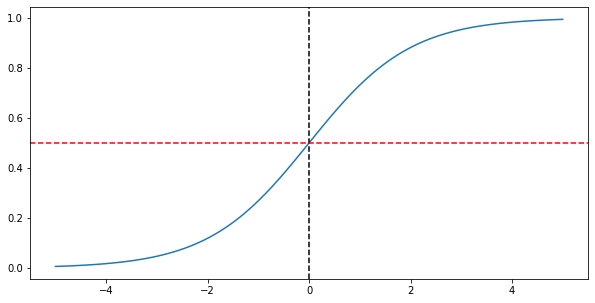

In [3]:
xs = np.linspace(-5,5,100)
ys = [1 / (1+np.exp(-z)) for z in xs]
plt.figure(figsize=(10,5))
plt.plot(xs,ys)
plt.axvline(0,0,c='k',ls='--')
plt.axhline(0.5,0,c='r',ls='--')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate an imbalanced dataset (skrajny przypadek)
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.92, 0.08],  # Imbalanced classes (95% to 5%)
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for classification metrics
def interactive_classification_metrics(C=1.0, threshold=0.5):
    # Train logistic regression model
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    
    # Apply threshold
    y_pred = (y_probs >= threshold).astype(int)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot decision boundary and data points
    plt.figure(figsize=(12, 6))
    
    # Mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, levels=[0, threshold, 1], alpha=0.8, cmap='coolwarm', linestyles='dashed')
    
    # Plot data points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, alpha=0.6)
    plt.title(f"Decision Boundary (Threshold={threshold:.2f})\nAccuracy={acc:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Probability of Class 1")
    plt.grid(True)
    plt.show()

# Interactive widgets for parameters
interact(
    interactive_classification_metrics,
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='C (Regularization)'),
    threshold=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.5, description='Threshold')
)


interactive(children=(FloatLogSlider(value=1.0, description='C (Regularization)', max=2.0, min=-2.0), FloatSli…

<function __main__.interactive_classification_metrics(C=1.0, threshold=0.5)>

# **Class Imbalance in Classification Problems**

Class imbalance refers to a situation where the number of samples in one class significantly differs from the number of samples in other classes within a dataset. This is a common issue in classification tasks, potentially leading to challenges in building effective models.

---

## **What is Class Imbalance?**

In binary classification, class imbalance occurs when one class (e.g., the positive class) is represented by significantly fewer samples than the other class (e.g., the negative class). The class with more samples is called the **majority class**, and the class with fewer samples is called the **minority class**.

### **Examples of Class Imbalance:**
- **Fraud Detection**:
  - 99.9% of transactions are legitimate, while only 0.1% are fraudulent.
- **Medical Diagnosis**:
  - Most individuals in a study are healthy, with only a small fraction being sick.
- **Spam Filters**:
  - The majority of emails are regular messages, while only a small percentage is spam.

---

## **Why is Class Imbalance a Problem?**

1. **Model Bias Towards the Majority Class**:
   - Machine learning algorithms optimize the objective function assuming balanced classes.
   - The model might ignore the minority class, achieving high accuracy but failing to classify minority samples correctly.

2. **Inadequate Evaluation Metrics**:
   - **Accuracy** can be misleading for imbalanced datasets.
     - Example: In a dataset where 99% of the data belongs to the majority class, a model predicting only the majority class achieves 99% accuracy but fails entirely for the minority class.

3. **Insufficient Information in the Minority Class**:
   - A small number of samples in the minority class limits the model's ability to learn patterns associated with that class.

---

## **How to Handle Class Imbalance**

### **1. Data Transformation**
- **Oversampling**:
  - Create additional samples for the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique).
- **Undersampling**:
  - Reduce the number of majority class samples by randomly removing a portion of them.
- **Synthetic Data Generation**:
  - Use generative models to create artificial samples for the minority class.

### **2. Algorithm Modification**
- **Class Weights**:
  - Adjust the algorithm to penalize misclassifications of the minority class more heavily (e.g., `class_weight` in scikit-learn).
- **Cost-sensitive Learning**:
  - Use a cost function that incorporates different weights for classes.

### **3. Choosing the Right Evaluation Metrics**
- **Precision** and **Recall**:
  - Crucial metrics for imbalanced datasets.
- **F1-Score**:
  - The harmonic mean of precision and recall, suitable for imbalanced data.
- **ROC-AUC**:
  - Evaluates the model's ability to distinguish between classes, independent of the decision threshold.
- **PR Curve (Precision-Recall Curve)**:
  - Illustrates the trade-off between precision and recall at different thresholds and is especially useful for imbalanced datasets.

### **4. Adjusting the Decision Threshold**
- Modify the threshold at which samples are classified as positive to account for the class imbalance.

---

## **Example of Class Imbalance Impact**

Consider a dataset where 95% of samples belong to the negative class and only 5% to the positive class:
- A model predicting only the negative class achieves 95% accuracy but fails to identify any positive samples.
- Focusing on metrics like precision, recall, and F1-score provides a better evaluation of the model's performance on the minority class.

---

## **Summary**

- Class imbalance is a common issue that affects the effectiveness of classification models.
- Proper data transformation, algorithm adjustments, and the use of appropriate evaluation metrics can help address this challenge.
- Understanding which errors are more costly in a given problem is key to tailoring the modeling strategy to meet those needs.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate an imbalanced dataset (skrajny przypadek)
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.92, 0.08],  # Imbalanced classes (95% to 5%)
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for classification metrics
def interactive_classification_metrics(C=1.0, threshold=0.5):
    # Train logistic regression model
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    
    # Apply threshold
    y_pred = (y_probs >= threshold).astype(int)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot decision boundary and data points
    plt.figure(figsize=(12, 6))
    
    # Mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, levels=[0, threshold, 1], alpha=0.8, cmap='coolwarm', linestyles='dashed')
    
    # Plot data points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, alpha=0.6)
    plt.title(f"Decision Boundary (Threshold={threshold:.2f})\nAccuracy={acc:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Probability of Class 1")
    plt.grid(True)
    plt.show()

# Interactive widgets for parameters
interact(
    interactive_classification_metrics,
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='C (Regularization)'),
    threshold=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.5, description='Threshold')
)


interactive(children=(FloatLogSlider(value=1.0, description='C (Regularization)', max=2.0, min=-2.0), FloatSli…

<function __main__.interactive_classification_metrics(C=1.0, threshold=0.5)>